In [1]:
import pandas as pd
import sys  
sys.path.insert(0, './Moduulit')
pd.options.mode.chained_assignment = None
# Importtaus tässä muodossa
from database_connection import database_query
from outliers import find_outliers, draw_histogram
from clean_dataframe import clean_dataframe
from write_df_to_database import write_df_to_mariadb
from xy_diskretisointi import xy_to_grid
from timestamp import aukioloajat
# tai from ... import *


# Jos datasetti on "df"

# Esim. find_outliers(df)
# Esim. draw_histogram(df['x'], df['y'], 20) <-- kolmas meinaa bins arvoa, eli histogrammin "rakeisuutta"

In [2]:
df = pd.read_csv('projekti2.csv').head(1000)
df

,Unnamed: 0,node_id,timestamp,x,y,z,q
0,0,b'-2393099149039893833',b'2020-06-24 12:20:08.533016+00:00',2762,-257,100,0
1,1,b'-2393099149039893833',b'2020-06-24 12:20:08.620015+00:00',2870,-344,100,0
2,2,b'-2393099149039893833',b'2020-06-24 12:20:09.622827+00:00',2916,-344,100,0
3,3,b'-2393099149039893833',b'2020-06-24 12:20:09.622846+00:00',2894,-254,100,0
4,4,b'-2393099149039893833',b'2020-06-24 12:20:10.116102+00:00',2888,-188,100,0
...,...,...,...,...,...,...,...
995,995,b'-2393099149039893833',b'2020-06-25 07:36:07.231741+00:00',1356,-193,100,0
996,996,b'-2393099149039893833',b'2020-06-25 07:36:17.23148+00:00',1343,-208,100,0
997,997,b'-2393099149039893833',b'2020-06-25 07:36:27.231952+00:00',1366,-194,100,0
998,998,b'-2393099149039893833',b'2020-06-25 07:36:37.231933+00:00',1345,-212,100,0


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
Number of missing variables in table
 Unnamed: 0    0
node_id       0
timestamp     0
x             0
y             0
z             0
q             0
dtype: int64
------------------------------
Unique values in columns

uniques in x 494
uniques in y 518
uniques in z 1
uniques in q 1
------------------------------
Checking z and q columns

uniques in z [100]
uniques in q [0]
------------------------------
Number of nodes: 1
------------------------------
Outliers

Data with outliers:  1000
Ouliers removed:     41
Data after:  959


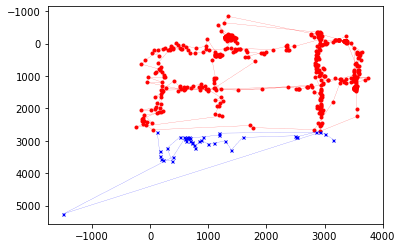

In [3]:
%time
df = find_outliers(df)

In [4]:
%time
df = clean_dataframe(df)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs


In [57]:
df.head(5)

,Unnamed: 0,node_id,timestamp,x,y
0,0,1,2020-06-24 15:20:08.533,2762,-257
1,1,1,2020-06-24 15:20:08.620,2870,-344
2,2,1,2020-06-24 15:20:09.623,2916,-344
3,3,1,2020-06-24 15:20:09.623,2894,-254
4,4,1,2020-06-24 15:20:10.116,2888,-188


In [58]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [7]:
df.head(10)

,node_id,timestamp,x,y
0,1,2020-06-24 15:20:08.533,2762,-257
1,1,2020-06-24 15:20:08.620,2870,-344
2,1,2020-06-24 15:20:09.623,2916,-344
3,1,2020-06-24 15:20:09.623,2894,-254
4,1,2020-06-24 15:20:10.116,2888,-188
5,1,2020-06-24 15:20:11.086,2910,-200
6,1,2020-06-24 15:20:11.820,2924,-111
7,1,2020-06-24 15:20:12.995,2928,5
8,1,2020-06-24 15:20:13.596,2987,6
9,1,2020-06-24 15:20:14.482,3038,-8


In [8]:
#df

In [59]:
 #määritellään aikadata tunneittain ja tehdään sille oma sarake

df['timebyhour'] = df.timestamp.dt.hour

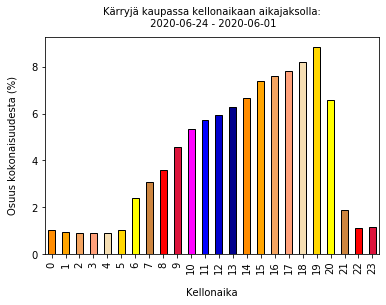

In [60]:
import matplotlib.pyplot as plt
import pandas as pd


    # Määritetään värit graafia varten
my_colors = [
    'darkorange',
    'orange',
    'sandybrown',
    'lightsalmon',
    'wheat',
    'gold',
    'yellow',
    'peru',
    'red',
    'crimson',
    'magenta',
    'blue',
    'mediumblue',
    'darkblue',]


    # Napataan välimuuttujaan
df_c = df

    # Kärryt per tunti
df_c['timebyhour'].value_counts(sort=False, normalize=True).mul(100).plot(kind='bar', color=my_colors, edgecolor='black');


# X-akselin teksti
plt.xlabel("Kellonaika", labelpad=14)


    # Pystyakselin teksti
plt.ylabel("Osuus kokonaisuudesta (%)", labelpad=14)
    
    
    # Otsikko johon päivämäärät datasta
plt.title("Kärryjä kaupassa kellonaikaan aikajaksolla:\n " + str(df.timestamp.dt.date.iloc[0]) + " - " + str(df.timestamp.dt.date.iloc[-1]), y=1.02, fontsize=10);

In [11]:
df = df.drop(df[(df.timestamp.dt.hour < 8)].index)
df = df.drop(df[(df.timestamp.dt.hour > 21)].index)

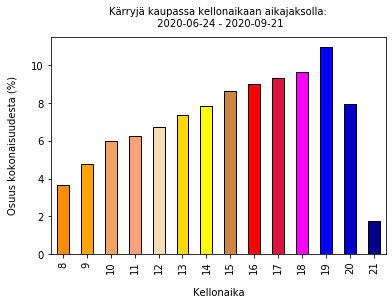

In [12]:
import matplotlib.pyplot as plt
import pandas as pd


    # Määritetään värit graafia varten
my_colors = [
    'darkorange',
    'orange',
    'sandybrown',
    'lightsalmon',
    'wheat',
    'gold',
    'yellow',
    'peru',
    'red',
    'crimson',
    'magenta',
    'blue',
    'mediumblue',
    'darkblue',]


    # Napataan välimuuttujaan
df_c = df

    # Kärryt per tunti
df_c['timebyhour'].value_counts(sort=False, normalize=True).mul(100).plot(kind='bar', color=my_colors, edgecolor='black');


# X-akselin teksti
plt.xlabel("Kellonaika", labelpad=14)


    # Pystyakselin teksti
plt.ylabel("Osuus kokonaisuudesta (%)", labelpad=14)
    
    
    # Otsikko johon päivämäärät datasta
plt.title("Kärryjä kaupassa kellonaikaan aikajaksolla:\n " + str(df.timestamp.dt.date.iloc[0]) + " - " + str(df.timestamp.dt.date.iloc[-1]), y=1.02, fontsize=10);

In [13]:
df['day'] = df.timestamp.dt.day
df['week'] = df.timestamp.dt.week
df['month'] = df.timestamp.dt.month

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [14]:
df.head(15)

,node_id,timestamp,x,y,timebyhour,day,week,month
0,1,2020-06-24 15:20:08.533,2762,-257,15,24,26,6
1,1,2020-06-24 15:20:08.620,2870,-344,15,24,26,6
2,1,2020-06-24 15:20:09.623,2916,-344,15,24,26,6
3,1,2020-06-24 15:20:09.623,2894,-254,15,24,26,6
4,1,2020-06-24 15:20:10.116,2888,-188,15,24,26,6
5,1,2020-06-24 15:20:11.086,2910,-200,15,24,26,6
6,1,2020-06-24 15:20:11.820,2924,-111,15,24,26,6
7,1,2020-06-24 15:20:12.995,2928,5,15,24,26,6
8,1,2020-06-24 15:20:13.596,2987,6,15,24,26,6
9,1,2020-06-24 15:20:14.482,3038,-8,15,24,26,6


In [15]:
df.dtypes

node_id                int64
timestamp     datetime64[ns]
x                      int64
y                      int64
timebyhour             int64
day                    int64
week                   int64
month                  int64
dtype: object

In [76]:
df_new = df
df_new = df_new.drop(df_new[(df_new.timestamp.dt.month > 8)].index)
df_new = df_new.drop(df_new[(df_new.timestamp.dt.month < 8)].index)
df_new = df_new.drop(df_new[(df_new.timestamp.dt.day < 12 )].index)
df_new = df_new.drop(df_new[(df_new.timestamp.dt.day > 20)].index)
df_new

,node_id,timestamp,x,y,timebyhour,day,week,month
166309,1,2020-08-12 08:00:04.602,2772,-358,8,12,33,8
166310,1,2020-08-12 08:00:14.601,2772,-355,8,12,33,8
166311,1,2020-08-12 08:00:23.603,2772,-352,8,12,33,8
166312,1,2020-08-12 08:00:32.603,2775,-356,8,12,33,8
166313,1,2020-08-12 08:00:53.601,2773,-356,8,12,33,8
...,...,...,...,...,...,...,...,...
4752994,13,2020-08-20 21:59:11.821,1454,1305,21,20,34,8
4752995,13,2020-08-20 21:59:21.821,1397,1275,21,20,34,8
4752996,13,2020-08-20 21:59:31.821,1417,1277,21,20,34,8
4752997,13,2020-08-20 21:59:41.821,1412,1280,21,20,34,8


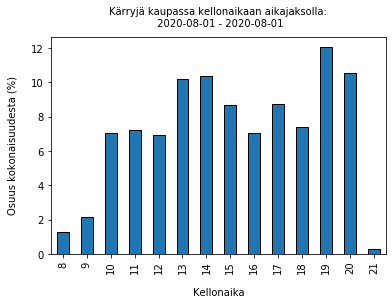

In [64]:



    # Määritetään värit graafia varten
'''
    my_colors = [
    'darkorange',
    'orange',
    'sandybrown',
    'lightsalmon',
    'wheat',
    'gold',
    'yellow',
    'peru',
    'red',
    'crimson',
    'magenta',
    'blue',
    'mediumblue',
    'darkblue',]
'''

    # Napataan välimuuttujaan
df_d = df_new

    # Kärryt per tunti
df_d['timebyhour'].value_counts(sort=False, normalize=True).mul(100).plot(kind='bar',  edgecolor='black'); #color=my_colors,


# X-akselin teksti
plt.xlabel("Kellonaika", labelpad=14)


    # Pystyakselin teksti
plt.ylabel("Osuus kokonaisuudesta (%)", labelpad=14)
    
    
    # Otsikko johon päivämäärät datasta
plt.title("Kärryjä kaupassa kellonaikaan aikajaksolla:\n " + str(df_new.timestamp.dt.date.iloc[0]) + " - " + str(df_new.timestamp.dt.date.iloc[-1]), y=1.02, fontsize=10);

In [82]:
def aukioloajat(df):
    
    df = df.drop(df[(df.timestamp.dt.hour < 8)].index) #dropataan kaikki 8-21 ulkopuolella olevat tunnit
    df = df.drop(df[(df.timestamp.dt.hour > 21)].index)
    df = df.reset_index # resetoidaan indexit, että voidaan ajaa uudet koodit
    df_temp = df[df.timestamp.dt.dayofweek == 6].index.values.tolist()
    df_new_temp = df.iloc[df_temp][df.iloc[df_temp].timebyhour < 10] # # Suodatetaan kaikkien 6 päivän indekseistä alle 10 tuntiset
    df = df.drop(df.index[df_new_temp.index.values])     # Poistetaan alkuperäisestä dataframesta kyseiset arvot
    df_temp = df[df.timestamp.dt.day == ].index.values.tolist()
    #df = df.drop(df.loc[((df.timestamp.dt.day == 25) & (df.timestamp.dt.month == 5) & (df.timestamp.dt.hour < 10))].index.tolist()
    
    

        
        
    
        
    
    
    

In [29]:
df_new = df

In [30]:
df_new['dayofweek'] = df_new.timestamp.dt.dayofweek


In [31]:
df_new

,node_id,timestamp,x,y,timebyhour,day,week,month,dayofweek
0,1,2020-06-24 15:20:08.533,2762,-257,15,24,26,6,2
1,1,2020-06-24 15:20:08.620,2870,-344,15,24,26,6,2
2,1,2020-06-24 15:20:09.623,2916,-344,15,24,26,6,2
3,1,2020-06-24 15:20:09.623,2894,-254,15,24,26,6,2
4,1,2020-06-24 15:20:10.116,2888,-188,15,24,26,6,2
...,...,...,...,...,...,...,...,...,...
4999995,13,2020-09-21 17:06:33.956,1563,1188,17,21,39,9,0
4999996,13,2020-09-21 17:06:43.956,1545,1193,17,21,39,9,0
4999997,13,2020-09-21 17:06:53.956,1550,1195,17,21,39,9,0
4999998,13,2020-09-21 17:07:03.956,1550,1194,17,21,39,9,0


In [32]:
df_new = df_new.reset_index()

In [33]:
# Kaikkien 6-päivien indeksit listaan
df_temp = df_new[df_new.timestamp.dt.dayofweek == 6].index.values.tolist()


In [34]:
# Suodatetaan kaikkien 6 päivän indekseistä alle 10 tuntiset
df_new_temp = df_new.iloc[df_temp][df_new.iloc[df_temp].timebyhour < 10]

In [35]:



# Poistetaan alkuperäisestä dataframesta kyseiset arvot
df_new = df_new.drop(df_new.index[df_new_temp.index.values])


In [37]:
df_new.loc[df_new.timestamp.dt.dayofweek ==6].loc[df_new.timebyhour < 10]

,index,node_id,timestamp,x,y,timebyhour,day,week,month,dayofweek


In [44]:
df = df.drop(df.loc[((df.timestamp.dt.day == 20) & (df.timestamp.dt.month == 6) & (df.timestamp.dt.hour < 10))].index.tolist())

In [49]:
df.loc[((df.timestamp.dt.day == 20) & (df.timestamp.dt.month == 6))]

,Unnamed: 0,node_id,timestamp,x,y


In [10]:
df = aukioloajat(df)



AttributeError: 'NoneType' object has no attribute 'drop'

AttributeError: 'NoneType' object has no attribute 'head'